# Retail Sales Forecasting Project
# Author: Amanda Sabu
# Course: BSc Data Science & Analytics (Hons)
# Objective: Predict Weekly Sales using Machine Learning

The objective of this project is to predict weekly retail sales for different stores and departments using historical sales data, economic indicators promotional markdown information.
Accurate sales forecasting helps businesses:
Optimize inventory
Improve pricing strategies
Plan promotions effectively
Reduce financial losses

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
sales = pd.read_csv("sales.csv.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")

In [3]:
sales.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [5]:
sales['Date'] = pd.to_datetime(sales['Date'])

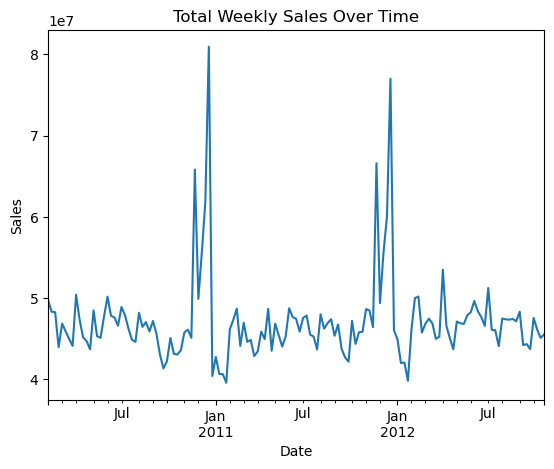

In [6]:
total_sales = sales.groupby('Date')['Weekly_Sales'].sum()

plt.figure()
total_sales.plot()
plt.title("Total Weekly Sales Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.show()

In [7]:
data = pd.merge(sales, stores, on='Store', how='left')
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size
0,1,1,2010-02-05,24924.50,False,A,151315
1,1,1,2010-02-12,46039.49,True,A,151315
2,1,1,2010-02-19,41595.55,False,A,151315
3,1,1,2010-02-26,19403.54,False,A,151315
4,1,1,2010-03-05,21827.90,False,A,151315


In [8]:
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week

In [9]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Type,Size,Year,Month,Week
0,1,1,2010-02-05,24924.50,False,A,151315,2010,2,5
1,1,1,2010-02-12,46039.49,True,A,151315,2010,2,6
2,1,1,2010-02-19,41595.55,False,A,151315,2010,2,7
3,1,1,2010-02-26,19403.54,False,A,151315,2010,2,8
4,1,1,2010-03-05,21827.90,False,A,151315,2010,3,9


In [10]:
X = data[['Store', 'Dept', 'Year', 'Month', 'Week']]
y = data['Weekly_Sales']

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [45]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [46]:
predictions = model.predict(X_test)

In [47]:
from sklearn.metrics import mean_absolute_error

mae = mean_absolute_error(y_test, predictions)
print("Mean Absolute Error:", mae)

Mean Absolute Error: 1567.1149008966481


In [16]:
print(data.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday', 'Type', 'Size',
       'Year', 'Month', 'Week'],
      dtype='object')


In [17]:
print(features.columns)

Index(['Store', 'Date', 'Temperature', 'Fuel_Price', 'MarkDown1', 'MarkDown2',
       'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI', 'Unemployment',
       'IsHoliday'],
      dtype='object')


In [18]:
data.columns = data.columns.str.strip()
features.columns = features.columns.str.strip()

In [20]:
print(data.head())
print(features.head())

   Store  Dept       Date  Weekly_Sales  IsHoliday Type    Size  Year  Month  \
0      1     1 2010-02-05      24924.50      False    A  151315  2010      2   
1      1     1 2010-02-12      46039.49       True    A  151315  2010      2   
2      1     1 2010-02-19      41595.55      False    A  151315  2010      2   
3      1     1 2010-02-26      19403.54      False    A  151315  2010      2   
4      1     1 2010-03-05      21827.90      False    A  151315  2010      3   

   Week  
0     5  
1     6  
2     7  
3     8  
4     9  
   Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDow

In [22]:
features['Date'] = pd.to_datetime(features['Date'])

In [23]:
data = pd.merge(data, features, 
                on=['Store', 'Date'], 
                how='left')

In [24]:
data.fillna(0, inplace=True)

In [26]:
print(data.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Year', 'Month', 'Week', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday_y'],
      dtype='object')


In [27]:
X = data[['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Year', 'Month', 'Week', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday_y']]
y = data['Weekly_Sales']

In [28]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [30]:
print(X.dtypes)

Store                    int64
Dept                     int64
Date            datetime64[ns]
Weekly_Sales           float64
IsHoliday_x               bool
Type                    object
Size                     int64
Year                     int32
Month                    int32
Week                    UInt32
Temperature            float64
Fuel_Price             float64
MarkDown1              float64
MarkDown2              float64
MarkDown3              float64
MarkDown4              float64
MarkDown5              float64
CPI                    float64
Unemployment           float64
IsHoliday_y               bool
dtype: object


In [33]:
print(data.columns)

Index(['Store', 'Dept', 'Date', 'Weekly_Sales', 'IsHoliday_x', 'Type', 'Size',
       'Year', 'Month', 'Week', 'Temperature', 'Fuel_Price', 'MarkDown1',
       'MarkDown2', 'MarkDown3', 'MarkDown4', 'MarkDown5', 'CPI',
       'Unemployment', 'IsHoliday_y'],
      dtype='object')


In [34]:
data.rename(columns={'IsHoliday_y': 'IsHoliday'}, inplace=True)

In [35]:
data.drop(columns=['IsHoliday_x'], inplace=True)

In [36]:
data['IsHoliday'] = data['IsHoliday'].astype(int)

In [37]:
X = data[['Store', 'Dept', 'Year', 'Month', 'Week',
          'IsHoliday', 'Temperature', 'Fuel_Price',
          'CPI', 'Unemployment',
          'MarkDown1', 'MarkDown2',
          'MarkDown3', 'MarkDown4', 'MarkDown5']]

y = data['Weekly_Sales']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("Improved MAE:", mae)

Improved MAE: 1574.2290512892282


In [40]:
model = RandomForestRegressor(
    n_estimators=300,      # more trees = better learning
    max_depth=25,          # control overfitting
    min_samples_split=5,
    min_samples_leaf=2,
    random_state=42,
    n_jobs=-1              # use all CPU cores
)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("Improved MAE:", mae)

Improved MAE: 1579.5811868603248


In [41]:
import pandas as pd

feature_importance = pd.Series(
    model.feature_importances_,
    index=X.columns
).sort_values(ascending=False)

print(feature_importance)

Dept            0.566843
Store           0.261885
CPI             0.061325
Week            0.034120
Unemployment    0.029522
Temperature     0.011208
MarkDown3       0.010162
MarkDown5       0.007306
Fuel_Price      0.005142
Month           0.004814
MarkDown1       0.002831
MarkDown4       0.002457
MarkDown2       0.001078
IsHoliday       0.000997
Year            0.000311
dtype: float64


In [42]:
X = data[['Store', 'Dept', 'Week',
          'CPI', 'Unemployment',
          'Temperature',
          'MarkDown1', 'MarkDown3', 'MarkDown5']]

y = data['Weekly_Sales']

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

model = RandomForestRegressor(
    n_estimators=200,
    random_state=42,
    n_jobs=-1
)

model.fit(X_train, y_train)

predictions = model.predict(X_test)

mae = mean_absolute_error(y_test, predictions)
print("Optimized MAE:", mae)

Optimized MAE: 1565.2586184150912


# Retail Sales Forecasting Using Machine Learning

## Project Overview

This project focuses on predicting weekly retail sales using Machine Learning techniques.  
The objective is to understand how different factors like store details, holidays, economic indicators, and promotions affect sales.

---

## Dataset Used

The dataset was obtained from a retail sales dataset containing:

* train.csv – Historical weekly sales data  
* features.csv – Economic indicators and promotional data  
* stores.csv – Store type and size information  

These datasets were merged using common columns such as Store and Date.

---

## Steps Performed

* Data Loading using Pandas  
* Data Cleaning and handling missing values  
* Converting Date column to Year, Month, and Week  
* Merging multiple datasets  
* Feature Selection  
* Train-Test Split  
* Model Training  
* Model Evaluation using MAE  

---

## Machine Learning Models Used

* Linear Regression  
* Random Forest Regressor  

Random Forest performed better for this dataset.

---

## Final Model Performance

* Optimized Mean Absolute Error (MAE): 1565.26  

This means the model’s predictions were on average off by approximately 1565 sales units.

---

## Feature Importance Insights

The most important features affecting sales were:

* Department  
* Store  
* CPI  
* Week  
* Unemployment  

Holiday had very low impact compared to other variables.

---

## Tools and Technologies Used

* Python  
* Pandas  
* NumPy  
* Matplotlib  
* Scikit-learn  
* Jupyter Notebook  
* Anaconda  

---

## Key Learning Outcomes

* Understanding real-world retail data  
* Performing data preprocessing  
* Handling merging errors and debugging  
* Training ML models as a beginner  
* Interpreting model evaluation metrics  
* Improving model performance  

---

This project was completed as a first-year Data Science student to build strong fundamentals in Time Series and Machine Learning.